## Tasks

Hint: use the file  Data_Marketing_Customer_Analysis_Round3.csv

- check if there are highly correlated features and drop them if there are any.
- One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
- for the first iteration, we will focus on the numericals data (numericals data frame) as our data source.

### (Optional Task)

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

#### varA
- Use minmax transform to bring varA's values into the range [0,1].
- Check that varA has been rescaled using a distplot or a histogram

#### varB
- Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
- Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

#### Hints:

1. Import transformers from the sklearn library from sklearn.preprocessing import PowerTransformer, StandardScaler, minmax_scale
- To reduce the skew and standardize a column, the PowerTransformer from sklearn has two options (box-cox and yeo-johnson). Try both and contrast the results.
- To rescale the column, use the minmax_scale transform.
2. Format the column correctly for the transformer. The sklearn transformers expect numpy.ndarrary object types as input. To take a pandas column and transform it into the correct form for PowerTransform and minmax_scaler use the to_numpy() and reshape(-1,1) methods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')
customer_df

,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,15563,no,premium,bachelor,1/19/11,jan,unemployed,f,61541,...,40,0,7,personal auto,personal l1,offer3,web,1214,luxury car,medsize
10685,north west,5259,no,basic,college,1/6/11,jan,employed,f,61146,...,68,0,6,personal auto,personal l3,offer2,branch,273,four-door car,medsize
10686,central,23893,no,extended,bachelor,2/6/11,feb,employed,f,39837,...,63,0,2,corporate auto,corporate l3,offer1,web,381,luxury suv,medsize
10687,west region,11971,no,premium,college,2/13/11,feb,employed,f,64195,...,27,4,6,personal auto,personal l1,offer1,branch,618,suv,medsize


In [3]:
numericals = customer_df.select_dtypes(include='number')
categoricals = customer_df.select_dtypes(include='object')

check if there are highly correlated features and drop them if there are any.

In [4]:
# Check if there are highly correlated features and drop them if there are any.
num_corr = numericals.corr()
num_corr
# There are none variables that highly correlated between each other

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).

In [5]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


In [6]:
categoricals['region'].unique()

array(['central', 'west region', 'east', 'north west'], dtype=object)

In [7]:
categoricals['response'].unique()

array(['no', 'yes'], dtype=object)

In [8]:
categoricals['coverage'].unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [9]:
categoricals['education'].unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [10]:
categoricals['effective_to_date'].unique()

array(['2/18/11', '1/18/11', '2/10/11', '1/11/11', '1/17/11', '2/14/11',
       '2/24/11', '1/19/11', '1/4/11', '1/2/11', '2/7/11', '1/31/11',
       '1/26/11', '2/28/11', '1/16/11', '2/26/11', '2/23/11', '1/15/11',
       '2/2/11', '2/15/11', '1/24/11', '2/21/11', '2/22/11', '1/7/11',
       '1/28/11', '2/8/11', '2/12/11', '2/20/11', '1/5/11', '2/19/11',
       '1/3/11', '2/3/11', '1/22/11', '1/23/11', '2/5/11', '2/13/11',
       '1/25/11', '2/16/11', '2/1/11', '1/27/11', '1/12/11', '1/20/11',
       '2/6/11', '2/11/11', '1/21/11', '1/29/11', '1/9/11', '2/9/11',
       '2/27/11', '1/1/11', '2/17/11', '2/25/11', '1/13/11', '1/6/11',
       '2/4/11', '1/14/11', '1/10/11', '1/8/11', '1/30/11'], dtype=object)

In [11]:
categoricals['month'].unique()

array(['feb', 'jan'], dtype=object)

In [12]:
categoricals['employment_status'].unique()

array(['employed', 'unemployed', 'medical leave', 'disabled', 'retired'],
      dtype=object)

In [13]:
categoricals['gender'].unique()

array(['m', 'f'], dtype=object)

In [14]:
categoricals['location_code'].unique()

array(['suburban', 'urban', 'rural'], dtype=object)

In [15]:
categoricals['marital_status'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [16]:
categoricals['policy_type'].unique()

array(['corporate auto', 'personal auto', 'special auto'], dtype=object)

In [17]:
categoricals['policy'].unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

In [18]:
categoricals['renew_offer_type'].unique()

array(['offer3', 'offer4', 'offer2', 'offer1'], dtype=object)

In [19]:
categoricals['sales_channel'].unique()

array(['agent', 'call center', 'branch', 'web'], dtype=object)

In [20]:
categoricals['vehicle_class'].unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury car',
       'luxury suv'], dtype=object)

In [21]:
categoricals['vehicle_size'].unique()

array(['medsize', 'small', 'large'], dtype=object)

In [22]:
# One Hot/Label Encoding of the categorical variables in the categoricals data frame that you created in Activity 3. ( Hint: check Dropfirst option).
# One hot encoder for the variables that only has 2 possible values
categoricals = pd.get_dummies(categoricals, columns = ['response', 'gender','month','region','employment_status','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)
categoricals

,coverage,education,effective_to_date,vehicle_size,response_yes,gender_m,month_jan,region_east,region_north west,region_west region,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,basic,college,2/18/11,medsize,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,basic,college,1/18/11,medsize,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,basic,bachelor,2/10/11,medsize,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,extended,college,1/11/11,medsize,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,premium,bachelor,1/17/11,medsize,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,premium,bachelor,1/19/11,medsize,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,basic,college,1/6/11,medsize,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,extended,bachelor,2/6/11,medsize,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10687,premium,college,2/13/11,medsize,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [23]:
# Ordinal Label encoder for the variables that has more than 2 possible values
from sklearn.preprocessing import OrdinalEncoder

encoder_coverage = OrdinalEncoder(categories=[['basic', 'extended', 'premium']])
encoder_education = OrdinalEncoder(categories=[['high school or below', 'college', 'bachelor', 'master', 'doctor']])
encoder_vehicle_size = OrdinalEncoder(categories=[['small', 'medsize', 'large']])

# Convert single column to a 2D array for fit_transform
categoricals['coverage'] = encoder_coverage.fit_transform(categoricals[['coverage']])
categoricals['education'] = encoder_education.fit_transform(categoricals[['education']])
categoricals['vehicle_size'] = encoder_vehicle_size.fit_transform(categoricals[['vehicle_size']])

categoricals

,coverage,education,effective_to_date,vehicle_size,response_yes,gender_m,month_jan,region_east,region_north west,region_west region,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0.0,1.0,2/18/11,1.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1/18/11,1.0,0,0,1,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0.0,2.0,2/10/11,1.0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
3,1.0,1.0,1/11/11,1.0,1,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,2.0,1/17/11,1.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2.0,2.0,1/19/11,1.0,0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,0.0,1.0,1/6/11,1.0,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,1.0,2.0,2/6/11,1.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
10687,2.0,1.0,2/13/11,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [24]:
# labeling the education column to my desired values
# education = ['college', 'bachelor', 'high school or below', 'doctor', 'master']
#education_label = {'high school or below': 0,
#             'college': 1,
#             'bachelor': 2,
#             'master': 3,
#             'doctor': 4}
#categoricals['education']= categoricals['education'].replace(education_label)

In [25]:
categoricals = categoricals.drop(['effective_to_date'], axis=1)

In [26]:
categoricals

,coverage,education,vehicle_size,response_yes,gender_m,month_jan,region_east,region_north west,region_west region,employment_status_employed,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0.0,1.0,1.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.0,1.0,1.0,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,0.0,2.0,1.0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
3,1.0,1.0,1.0,1,1,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2.0,2.0,1.0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2.0,2.0,1.0,0,0,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,0.0,1.0,1.0,0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,1.0,2.0,1.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
10687,2.0,1.0,1.0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0


In [27]:
customer_labeled_df = pd.concat([categoricals, numericals])

In [28]:
customer_labeled_df

,coverage,education,vehicle_size,response_yes,gender_m,month_jan,region_east,region_north west,region_west region,employment_status_employed,...,vehicle_class_suv,vehicle_class_two-door car,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15563.0,61541.0,253.0,12.0,40.0,0.0,7.0,1214.0
10685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5259.0,61146.0,65.0,7.0,68.0,0.0,6.0,273.0
10686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,23893.0,39837.0,201.0,11.0,63.0,0.0,2.0,381.0
10687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,11971.0,64195.0,158.0,0.0,27.0,4.0,6.0,618.0


#### Optional Task

Begin by visually examining distributions (histograms) of the numerical features. Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

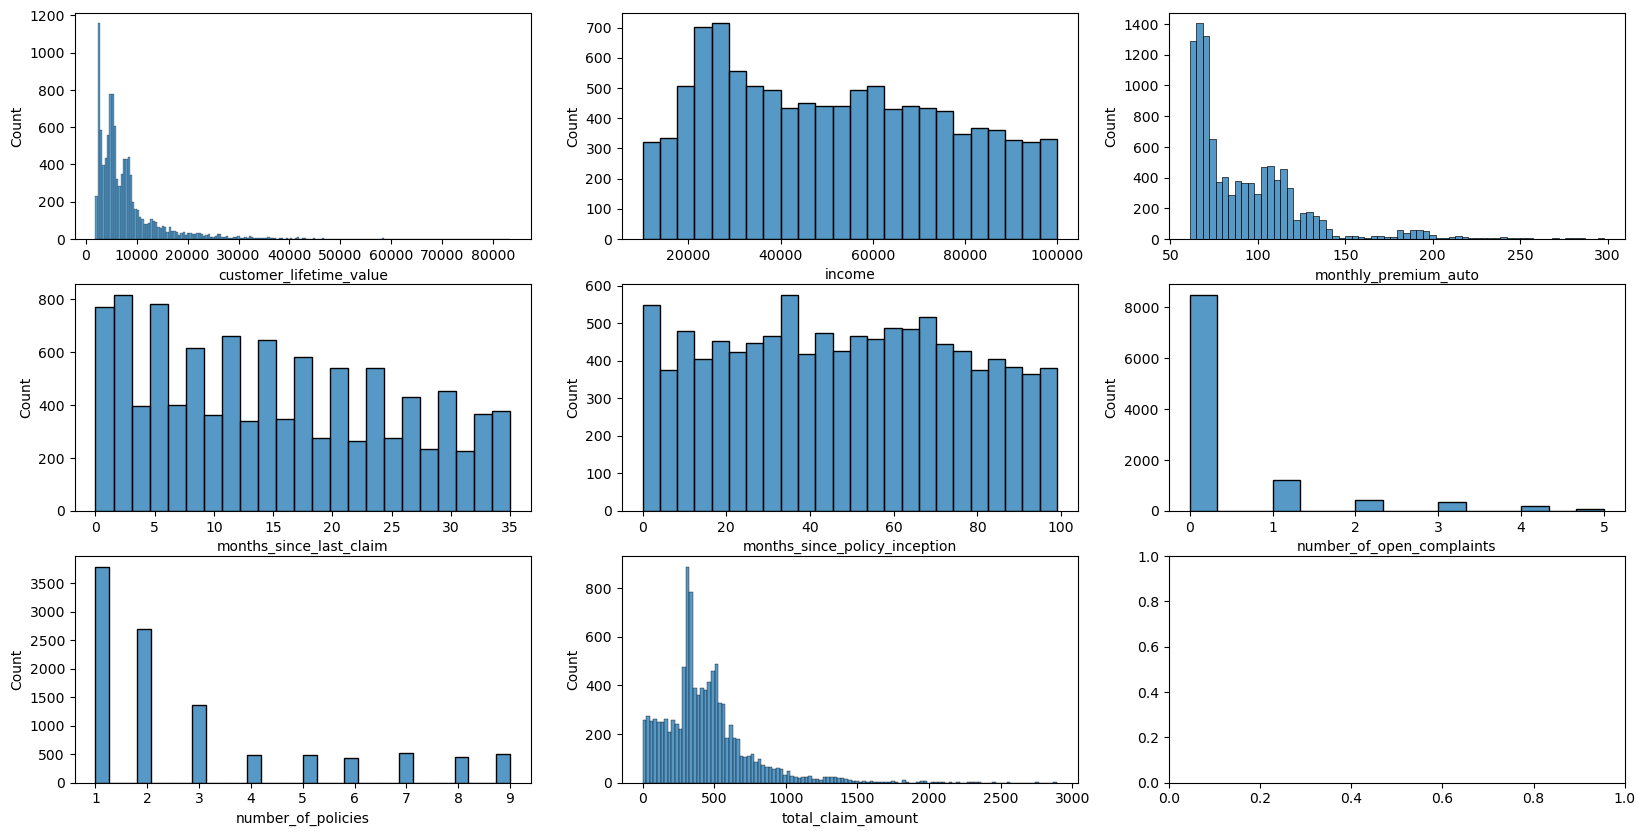

In [29]:
# Begin by visually examining distributions (histograms) of the numerical features.
fig, axes = plt.subplots(3,3,figsize=(20,10))
sns.histplot(numericals.customer_lifetime_value, ax=axes [0,0])
sns.histplot(numericals.income, ax=axes [0,1])
sns.histplot(numericals.monthly_premium_auto, ax=axes [0,2])
sns.histplot(numericals.months_since_last_claim, ax=axes [1,0])
sns.histplot(numericals.months_since_policy_inception, ax=axes [1,1])
sns.histplot(numericals.number_of_open_complaints, ax=axes [1,2])
sns.histplot(numericals.number_of_policies, ax=axes [2,0])
sns.histplot(numericals.total_claim_amount, ax=axes [2,1])

Select a variable, call it varA, which takes on a wide range of numerical values, and another, varB, which has a noticeably large skew. For example, you might select customer_lifetime_value as a candidate varB which has skew.

varA
-Use minmax transform to bring varA's values into the range [0,1].
-Check that varA has been rescaled using a distplot or a histogram

varB
-Use StandardScaler or PowerTransform to reduce the skew and standardize varB's distribution.
-Check that the result has zero mean, unit variance, and reduced skew using mean(), std(), and a plot of the PDF.

In [30]:
varA = numericals['income']
varB = numericals['customer_lifetime_value']

<AxesSubplot:ylabel='Count'>

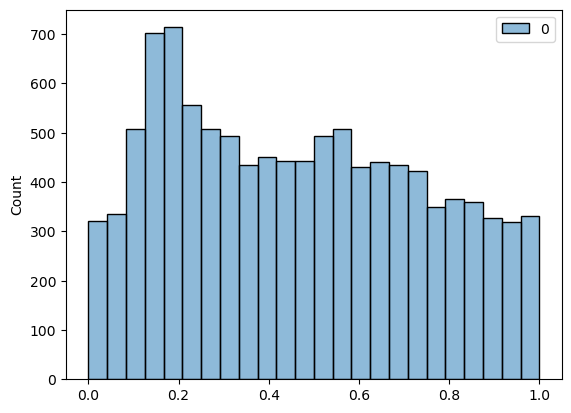

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
varA_2d = varA.values.reshape(-1,1)
varA_scaled_minmax = scaler_minmax.fit_transform(varA_2d)
sns.histplot(varA_scaled_minmax)

<AxesSubplot:ylabel='Count'>

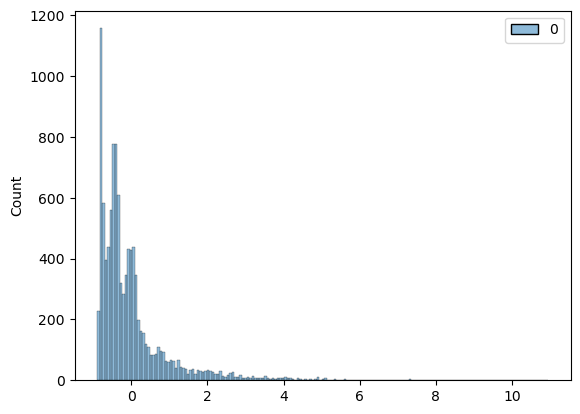

In [32]:
from sklearn.preprocessing import StandardScaler
scaler_std = StandardScaler()
varB_2d = varB.values.reshape(-1,1)
varB_scaled_std = scaler_std.fit_transform(varB_2d)
sns.histplot(varB_scaled_std)

<AxesSubplot:ylabel='Count'>

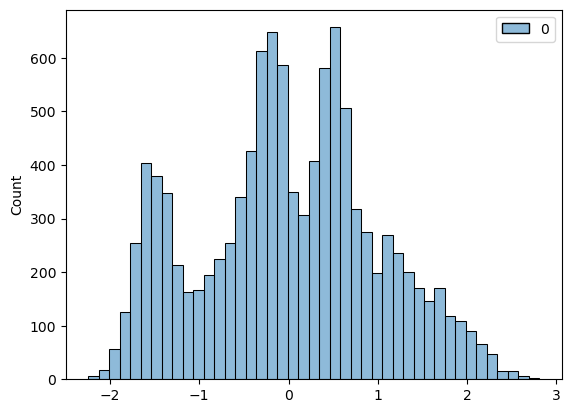

In [42]:
from sklearn.preprocessing import PowerTransformer
scaler_pt_yj = PowerTransformer(method='yeo-johnson', standardize=True, copy=True)
varB_scaled_pt_yj = scaler_pt_yj.fit_transform(varB_2d)
sns.histplot(varB_scaled_pt_yj)

In [43]:
np.mean(varB_scaled_pt_yj)

4.189204154514128e-15

In [38]:
np.std(varB_scaled_pt_yj)

1.0000000000000002

<AxesSubplot:ylabel='Count'>

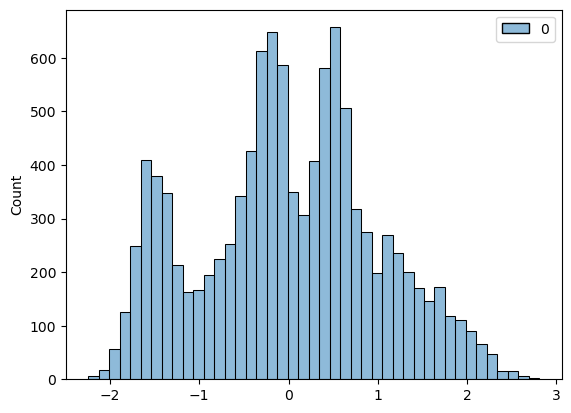

In [36]:
from sklearn.preprocessing import PowerTransformer
scaler_pt_bc = PowerTransformer(method='box-cox', standardize=True, copy=True)
varB_scaled_pt_bc = scaler_pt_bc.fit_transform(varB_2d)
sns.histplot(varB_scaled_pt_bc)

In [41]:
np.mean(varB_scaled_pt_bc)

-3.792353173834196e-15

In [40]:
np.std(varB_scaled_pt_bc)

1.0